In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('NSE_data_all_stocks_2018.csv')

In [3]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-18,EGAD,Eaagads Ltd,8.2,14,25,25,25,22.75,2.25,9.89%,"10,500",NaN
1,2-Jan-18,KUKZ,Kakuzi Plc,300,423.5,329,329,329,329,NaN,NaN,NaN,NaN
2,2-Jan-18,KAPC,Kapchorua Tea Kenya Plc,59,95,67.5,70,67.5,65.5,2,3.05%,"1,000",NaN
3,2-Jan-18,LIMT,Limuru Tea Plc,385,475,500,500,500,500,NaN,NaN,NaN,NaN
4,2-Jan-18,SASN,Sasini Plc,14.8,19.6,27,27.5,27,29.5,-2.5,8.47%,300,NaN


In [4]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
17645,31-Dec-18,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","2,833.84","2,833.84","2,833.84","2,800.95",32.89,1.17%,NaN,NaN
17646,31-Dec-18,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","3,551.59","3,551.59","3,551.59","3,579.32",-27.73,0.77%,NaN,NaN
17647,31-Dec-18,^NASI,NSE All-Share Index,124.3,171.36,140.43,140.43,140.43,142,-1.57,1.11%,NaN,NaN
17648,31-Dec-18,^ZKEQTK,Zamara Kenya Equity Index (KES),"1,513.07","2,242.89","1,642.46","1,642.46","1,642.46","1,650.36",-7.9,0.48%,NaN,NaN
17649,31-Dec-18,^ZKEQTU,Zamara Kenya Equity Index (USD),"1,225.28","1,905.40","1,388.47","1,388.47","1,388.47","1,394.46",-5.99,0.43%,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17650 entries, 0 to 17649
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       17650 non-null  object 
 1   CODE       17650 non-null  object 
 2   NAME       17650 non-null  object 
 3   12m Low    17650 non-null  object 
 4   12m High   17650 non-null  object 
 5   Day Low    17650 non-null  object 
 6   Day High   17650 non-null  object 
 7   Day Price  17650 non-null  object 
 8   Previous   17649 non-null  object 
 9   Change     10715 non-null  object 
 10  Change%    10712 non-null  object 
 11  Volume     12665 non-null  object 
 12  Adjust     665 non-null    float64
dtypes: float64(1), object(12)
memory usage: 1.8+ MB


In [6]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17645,False,False,False,False,False,False,False,False,False,False,False,True,True
17646,False,False,False,False,False,False,False,False,False,False,False,True,True
17647,False,False,False,False,False,False,False,False,False,False,False,True,True
17648,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change        6935
Change%       6938
Volume        4985
Adjust       16985
dtype: int64

In [8]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-18,EGAD,Eaagads Ltd,8.2,14,25,25,25,22.75,2.25,9.89%,"10,500",0.0
1,2-Jan-18,KUKZ,Kakuzi Plc,300,423.5,329,329,329,329,0,0,0,0.0
2,2-Jan-18,KAPC,Kapchorua Tea Kenya Plc,59,95,67.5,70,67.5,65.5,2,3.05%,"1,000",0.0
3,2-Jan-18,LIMT,Limuru Tea Plc,385,475,500,500,500,500,0,0,0,0.0
4,2-Jan-18,SASN,Sasini Plc,14.8,19.6,27,27.5,27,29.5,-2.5,8.47%,300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17645,31-Dec-18,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","2,833.84","2,833.84","2,833.84","2,800.95",32.89,1.17%,0,0.0
17646,31-Dec-18,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","3,551.59","3,551.59","3,551.59","3,579.32",-27.73,0.77%,0,0.0
17647,31-Dec-18,^NASI,NSE All-Share Index,124.3,171.36,140.43,140.43,140.43,142,-1.57,1.11%,0,0.0
17648,31-Dec-18,^ZKEQTK,Zamara Kenya Equity Index (KES),"1,513.07","2,242.89","1,642.46","1,642.46","1,642.46","1,650.36",-7.9,0.48%,0,0.0


In [9]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [13]:
df['NAME'].value_counts()

Eaagads Ltd                        250
Kurwitu Ventures Ltd               250
Kakuzi Plc                         250
KPLC-P4                            250
KPLC-P7                            250
                                  ... 
NSE All-Share Index                241
FTSE NSE Kenya 25 Index            167
Zamara Kenya Equity Index (KES)    121
Zamara Kenya Equity Index (USD)    121
BK Group Plc                        18
Name: NAME, Length: 73, dtype: int64

In [14]:
df.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change        object
Change%       object
Volume        object
Adjust       float64
dtype: object

Text(0, 0.5, 'Adjust')

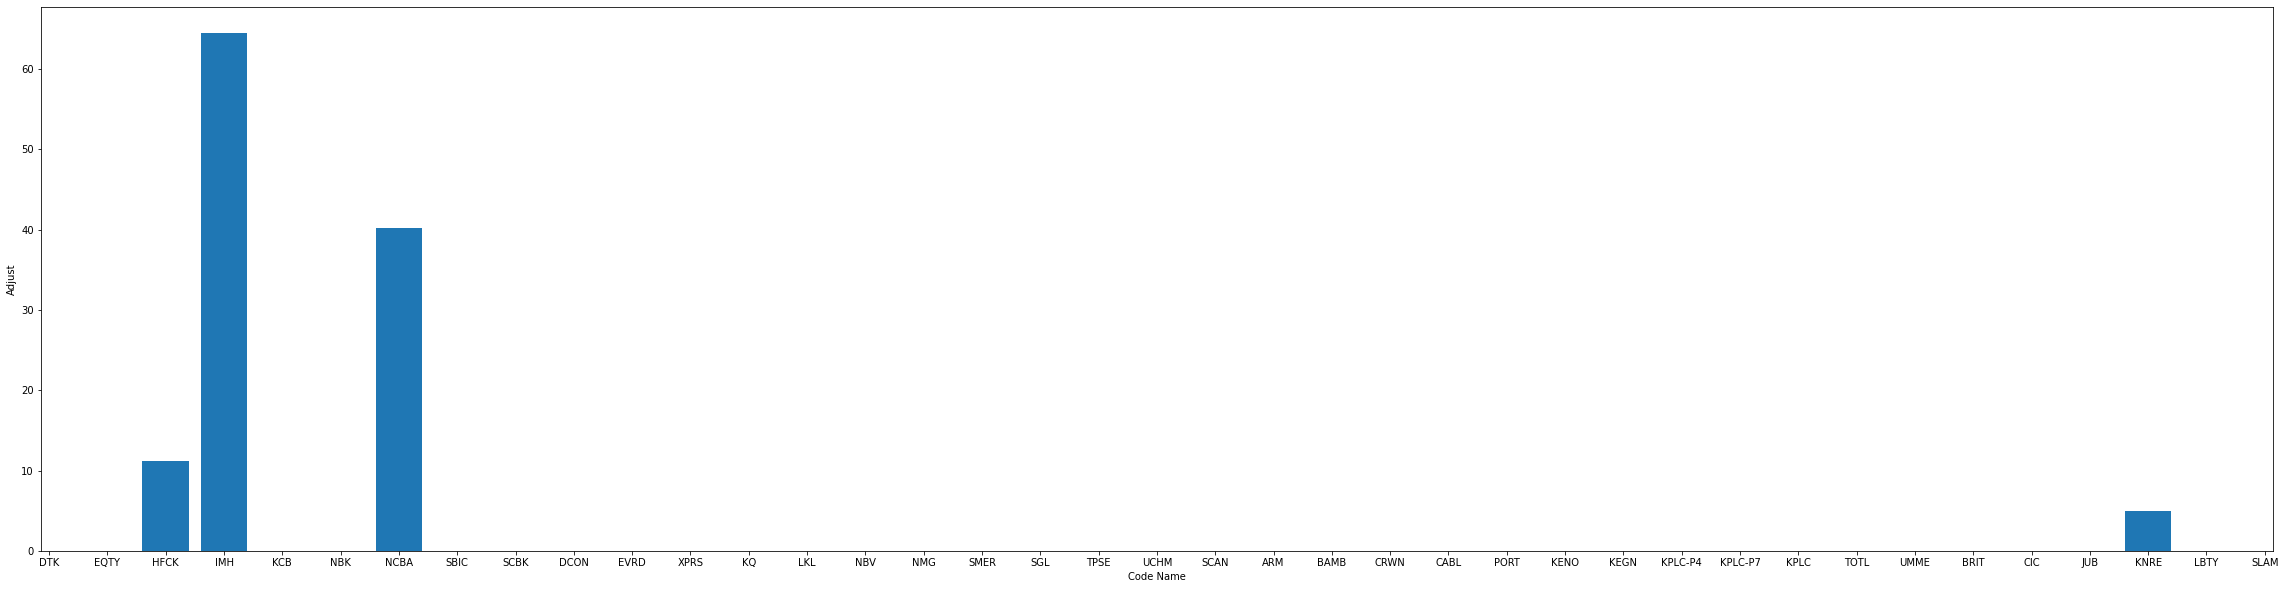

In [11]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')